In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", 
          "Setembro", "Outubro", "Novembro", "Dezembro"]

years = ["2018", "2019"]

In [3]:
for year in years:
    for i,month in enumerate(months):
        if year in ["2019"]:
            xls = pd.ExcelFile(f"Data/Raw/{year}/{month}{year}/{i+1}. {month} {year}_ocupaçao útil_Enviado.xlsx")
        else:
            xls = pd.ExcelFile(f"Data/Raw/{year}/{month}/{i+1}. {month} {year}_ocupaçao útil_Enviado.xlsx")
        for name in xls.sheet_names[1:]:
            df = pd.read_excel(xls, name, names = ["A","B", "Distance", "PassagersAtoB", "PassagersBtoA", "PassagersTotal", 
                                                                                                "EurotramAtoB", "EurotamBtoA", "EurotramTotal", "TraintramAtoB",
                                                                                               "TraintramBtoA", "TraintramTotal", "OccupancyAtoB", "OccupancyBtoA",
                                                                                               "OccupancyTotal"], usecols = [i for i in range(1,16)])
            df = df.iloc[3:85]
            df["PassagersAtoB"] = df['PassagersAtoB'].apply(np.floor)
            df["PassagersBtoA"] = df['PassagersBtoA'].apply(np.floor)
            df["PassagersTotal"] = df['PassagersTotal'].apply(np.floor)
            df.replace("ASra da Hora", "Sra da Hora", inplace = True)
            df.replace("BSra da Hora", "Sra da Hora", inplace = True)
            df.replace("BFonte do Cuco", "Fonte do Cuco", inplace = True)
            df.replace("Verdes (B)", "Verdes", inplace = True)
            df.replace("Verdes (E)", "Verdes", inplace = True)
            df.replace("CSra da Hora", "Sra da Hora", inplace = True)
            df.replace("CFonte do Cuco", "Fonte do Cuco", inplace = True)
            df.replace("Trindade S", "Trindade",inplace = True)
            
            if year in ["2019"]:
                df.to_csv(f"Data/Cleaned/{year}/{month}{year}/{name}.csv")
            else:
                df.to_csv(f"Data/Cleaned/{year}/{month}/{name}.csv")

In [4]:
df6 = pd.read_csv("Data/Cleaned/2018/Abril/Média 6h-7h.csv")
df7 = pd.read_csv("Data/Cleaned/2018/Abril/Média 7h-8h.csv")
df8 = pd.read_csv("Data/Cleaned/2018/Abril/Média 8h-9h.csv")
df9 = pd.read_csv("Data/Cleaned/2018/Abril/Média 9h-10h.csv")
df10 = pd.read_csv("Data/Cleaned/2018/Abril/Média 10h-11h.csv")
df11 = pd.read_csv("Data/Cleaned/2018/Abril/Média 11h-12h.csv")
df12 = pd.read_csv("Data/Cleaned/2018/Abril/Média 12h-13h.csv")
df13 = pd.read_csv("Data/Cleaned/2018/Abril/Média 13h-14h.csv")
df14 = pd.read_csv("Data/Cleaned/2018/Abril/Média 14h-15h.csv")
df15 = pd.read_csv("Data/Cleaned/2018/Abril/Média 15h-16h.csv")
df16 = pd.read_csv("Data/Cleaned/2018/Abril/Média 16h-17h.csv")
df17 = pd.read_csv("Data/Cleaned/2018/Abril/Média 17h-18h.csv")
df18 = pd.read_csv("Data/Cleaned/2018/Abril/Média 18h-19h.csv")
df19 = pd.read_csv("Data/Cleaned/2018/Abril/Média 19h-20h.csv")
df20 = pd.read_csv("Data/Cleaned/2018/Abril/Média 20h-21h.csv")
df21 = pd.read_csv("Data/Cleaned/2018/Abril/Média 21h-22h.csv")
df22 = pd.read_csv("Data/Cleaned/2018/Abril/Média 22h-23h.csv")
df23 = pd.read_csv("Data/Cleaned/2018/Abril/Média 23h-0h.csv")

dataset_list = [f"df{i}" for i in range(6,24)]

[280.0, 474.0, 514.0, 507.0, 505.0, 486.0, 539.0, 480.0, 512.0, 507.0, 511.0, 485.0, 503.0, 507.0, 283.0, 229.0, 161.0, 159.0]


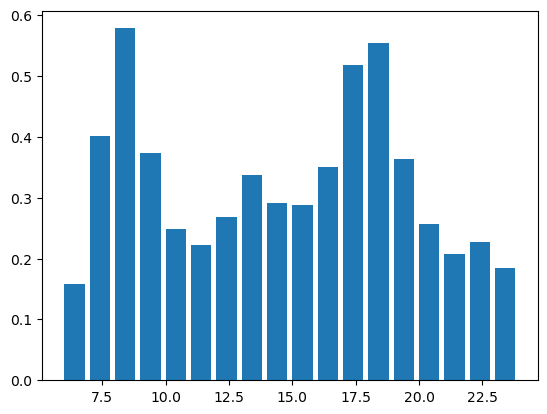

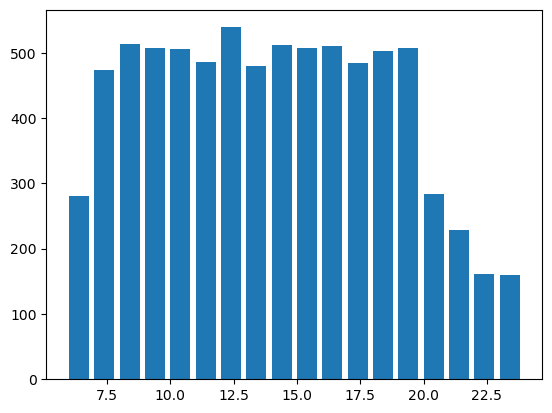

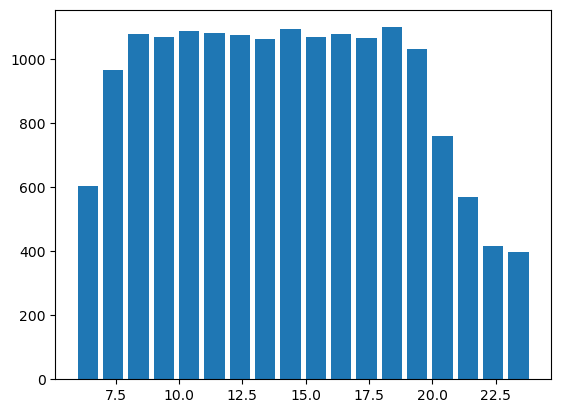

In [5]:
occupancy = []
tramtrains = []
eurotrams = []
AtoB = []
BtoA = []

A = "Lapa"
B = "Trindade"

for dataset in dataset_list:
    dataset = eval(dataset)
    
    data = dataset[(dataset["A"] == A) & (dataset["B"] == B)]
    
    if data.empty:
        data = dataset[(dataset["A"] == B) & (dataset["B"] == A)]
        

    occupancy.append(float(data["OccupancyTotal"]))
    tramtrains.append(float(data["TraintramTotal"]))
    eurotrams.append(float(data["EurotramTotal"]))


print(tramtrains)
plt.bar([i for i in range(6,24)],occupancy, align = "edge")
plt.show()
plt.bar([i for i in range(6,24)],tramtrains, align = "edge")
plt.show()
plt.bar([i for i in range(6,24)],np.array(tramtrains) + np.array(eurotrams), align = "edge")
plt.show()

In [6]:
print(tramtrains)

[280.0, 474.0, 514.0, 507.0, 505.0, 486.0, 539.0, 480.0, 512.0, 507.0, 511.0, 485.0, 503.0, 507.0, 283.0, 229.0, 161.0, 159.0]


In [7]:
df = pd.read_csv("Data/Cleaned/2018/Abril/Média Mensal.csv")

In [8]:
df

,Unnamed: 0,A,B,Distance,PassagersAtoB,PassagersBtoA,PassagersTotal,EurotramAtoB,EurotamBtoA,EurotramTotal,TraintramAtoB,TraintramBtoA,TraintramTotal,OccupancyAtoB,OccupancyBtoA,OccupancyTotal
0,3,Fânzeres,Venda Nova,440.45,8681,12761,21442,2090,2051,4141,0,0,0,0.019230,0.028807,0.023973
1,4,Venda Nova,Carreira,583.47,15898,23331,39229,2088,2053,4141,0,0,0,0.035251,0.052613,0.043859
2,5,Carreira,Baguim,786.02,24512,32228,56740,2090,2055,4145,0,0,0,0.054298,0.072605,0.063374
3,6,Baguim,Campainha,751.70,30591,36477,67069,2089,2058,4147,0,0,0,0.067797,0.082059,0.074875
4,7,Campainha,Rio Tinto,859.99,42153,46114,88268,2085,2058,4143,0,0,0,0.093599,0.103739,0.098636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,80,Salgueiros,Polo Universitario,775.36,266525,257099,523624,5238,5191,10429,0,0,0,0.235569,0.229296,0.232447
78,81,Polo Universitario,I.P.O.,827.64,201647,201747,403394,5228,5177,10405,0,0,0,0.178568,0.180416,0.179488
79,82,I.P.O.,Hospital São João,351.77,90767,106574,197341,5223,5175,10398,0,0,0,0.080456,0.095343,0.087865
80,83,Verdes (E),Botica,683.54,31341,63777,95119,1268,1251,2519,0,0,0,0.114433,0.236023,0.174818


In [9]:
lista = []

for i in range(len(df[df["A"] == "Sra da Hora"]["B"])):
    lista.append(df[df["A"] == "Sra da Hora"]["B"].iloc[i])

In [42]:
df8_OccAB = df8[["A", "B", "OccupancyAtoB"]]
df8_OccBA = df8[["A", "B", "OccupancyBtoA"]]
col_list = list(df8_OccBA)
col_list[0], col_list[1] = col_list[1], col_list[0]
df8_OccBA.columns = col_list
df8_OccAB = df8_OccAB.rename(columns = {"OccupancyAtoB" : "Occupancy"})
df8_OccBA = df8_OccBA.rename(columns = {"OccupancyBtoA" : "Occupancy"})
df_occupancy_morning_peak = pd.concat([df8_OccAB, df8_OccBA]).sort_values(by = ["Occupancy"]).tail(10)

In [44]:
df18_OccAB = df18[["A", "B", "OccupancyAtoB"]]
df18_OccBA = df18[["A", "B", "OccupancyBtoA"]]

col_list = list(df18_OccBA)
col_list[0], col_list[1] = col_list[1], col_list[0]
df18_OccBA.columns = col_list

df18_OccAB = df18_OccAB.rename(columns = {"OccupancyAtoB" : "Occupancy"})
df18_OccBA = df18_OccBA.rename(columns = {"OccupancyBtoA" : "Occupancy"})

df_occupancy_evening_peak = pd.concat([df18_OccAB, df18_OccBA]).sort_values(by = ["Occupancy"]).tail(10)

In [ ]:
df_morning_PassAB = df_morning[["A", "B", "PassagersAtoB"]]
df_morning_PassBA = df_morning[["A", "B", "PassagersBtoA"]]
col_list = list(df_morning_PassBA)
col_list[0], col_list[1] = col_list[1], col_list[0]
df_morning_PassBA.columns = col_list
df_morning_PassAB = df_morning_PassAB.rename(columns = {"A": "Station A", "B": "Station B", "PassagersAtoB" : "Number of passagers"})
df_morning_PassBA = df_morning_PassBA.rename(columns = {"A": "Station A", "B": "Station B", "PassagersBtoA" : "Number of passagers"})
df_passagers_morning_peak = pd.concat([df_morning_PassAB, df_morning_PassBA]).sort_values(by = ["Number of passagers"], ascending = False).head(10).reset_index(drop = True)
df_passagers_morning_peak.index = np.arange(1, len(df_passagers_morning_peak) + 1)
df_passagers_morning_peak["Number of passagers"] = np.round(df_passagers_morning_peak["Number of passagers"])

df_evening_PassAB = df_evening[["A", "B", "PassagersAtoB"]]
df_evening_PassBA = df_evening[["A", "B", "PassagersBtoA"]]
col_list = list(df_evening_PassBA)
col_list[0], col_list[1] = col_list[1], col_list[0]
df_evening_PassBA.columns = col_list
df_evening_PassAB = df_evening_PassAB.rename(columns = {"A": "Station A", "B": "Station B", "PassagersAtoB" : "Number of passagers"})
df_evening_PassBA = df_evening_PassBA.rename(columns = {"A": "Station A", "B": "Station B", "PassagersBtoA" : "Number of passagers"})
df_passagers_evening_peak = pd.concat([df_evening_PassAB, df_evening_PassBA]).sort_values(by = ["Number of passagers"], ascending = False).head(10).reset_index(drop = True)
df_passagers_evening_peak.index = np.arange(1, len(df_passagers_evening_peak) + 1)
df_passagers_evening_peak["Number of passagers"] = np.round(df_passagers_evening_peak["Number of passagers"])